In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [57]:
pos_step = 1.0
x_range = np.arange(0,10,pos_step)
y_range = np.arange(0,10,pos_step)

In [58]:
vmin = 1.0
vmax = 1.2
spd_range = np.linspace(vmin,vmax,3)
print(spd_range)

[1.  1.1 1.2]


In [59]:
num_angles = 8
hdg_range = np.arange(0,2*np.pi,2*np.pi/num_angles)
print(hdg_range)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]


In [60]:
grid_points = [(x,y,spd*np.cos(theta),spd*np.sin(theta)) for x in x_range for y in y_range for theta in hdg_range for spd in spd_range]
num_points = len(grid_points)
print(num_points)

2400


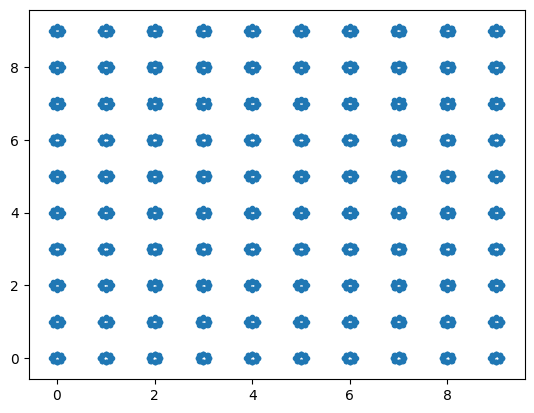

In [61]:
vel_scale = 0.1
plt.plot([p[0]+vel_scale*p[2] for p in grid_points],[p[1]+vel_scale*p[3] for p in grid_points],'.')

In [62]:
cost_matrix = np.inf*np.ones((num_points,num_points))

In [63]:
dmax = 1.5*pos_step
amax = 0.5*(vmax-vmin)

def travel_time(s1,s2):
    x1,y1,vx1,vy1 = s1
    x2,y2,vx2,vy2 = s2
    if x1==x2 and y1==y2:
        return np.inf
    dist = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    if dist>dmax:
        return np.inf
    spd = np.sqrt(vx1**2 + vy1**2)
    t_guess = dist/spd
    dx = (x2 - x1 - 0.5*(vx1+vx2)*t_guess)
    dy = (y2 - y1 - 0.5*(vy1+vy2)*t_guess)
    if dx**2 + dy**2 > dmax**2:
        return np.inf
    ax = (vx2-vx1)/t_guess
    ay = (vy2-vy1)/t_guess
    if ax**2 + ay**2 > amax**2:
        return np.inf
    return t_guess
    

In [64]:
for (i1,s1) in enumerate(grid_points):
    for (i2,s2) in enumerate(grid_points):
        t12 = travel_time(s1,s2)
        cost_matrix[i1,i2] = t12

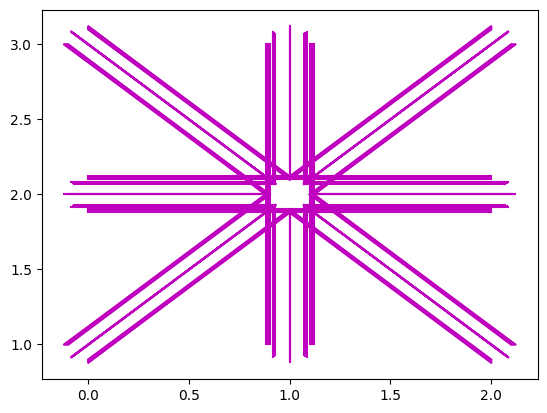

In [65]:
for (i1,s1) in enumerate(grid_points):
    if s1[0]!=1.0:
        continue
    if s1[1]!=2.0:
        continue
    for (i2,s2) in enumerate(grid_points):
        if cost_matrix[i1,i2] != np.inf:
            plt.plot([s1[0]+vel_scale*s1[2],s2[0]+vel_scale*s2[2]],
                     [s1[1]+vel_scale*s1[3],s2[1]+vel_scale*s2[3]],'m-')
plt.show()

In [66]:
from scipy.sparse.csgraph import shortest_path
path_length,predecessors = shortest_path(cost_matrix, return_predecessors=True)

In [75]:
start_node = 120
target_node = 0
print(path_length[start_node,:])
print(grid_points[start_node])
print(grid_points[target_node])
print(path_length[start_node,target_node])
print(predecessors[start_node,target_node])

[ 5. inf inf ... inf inf inf]
(0.0, 5.0, 1.0, 0.0)
(0.0, 0.0, 1.0, 0.0)
5.0
24


In [77]:
predecessors[start_node,24]

48

24
48
72
96
120


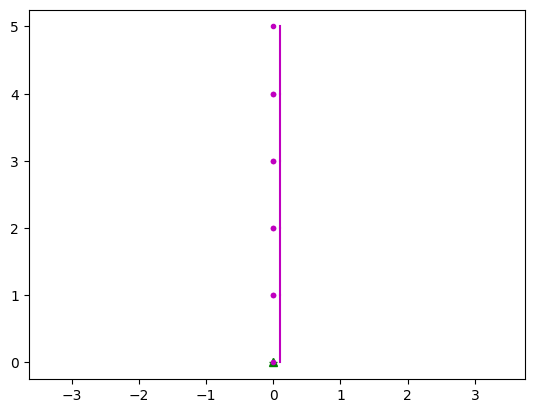

In [78]:
plt.plot([grid_points[curr_node][0]],
         [grid_points[curr_node][1]],'g+')
plt.plot([grid_points[target_node][0]],
         [grid_points[target_node][1]],'g^')
curr_node = target_node
for kk in range(len(grid_points)):
    next_node = predecessors[start_node,curr_node]
    print(next_node)
    plt.plot([grid_points[curr_node][0] + vel_scale*grid_points[curr_node][2],
              grid_points[next_node][0] + vel_scale*grid_points[next_node][2]],
             [grid_points[curr_node][1] + vel_scale*grid_points[curr_node][3],
              grid_points[next_node][1] + vel_scale*grid_points[next_node][3]],'m-')
    plt.plot([grid_points[curr_node][0],
              grid_points[next_node][0]],
             [grid_points[curr_node][1],
              grid_points[next_node][1]],'m.')
    curr_node=next_node
    if curr_node==start_node:
        break
plt.axis('equal')
plt.show()